In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
TESTING_DATA_PATH='/content/gdrive/MyDrive/classification_mixOfDatasets_plantdoc/plantdoc_tomato'

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
%cd /content
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download lavaman151/plantifydr-dataset

/content
100% 2.57G/2.58G [00:40<00:01, 4.77MB/s]
100% 2.58G/2.58G [00:40<00:00, 68.2MB/s]


In [ ]:
!unzip plantifydr-dataset.zip

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D, Conv2D,InputLayer
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import InceptionResNetV2
import keras.backend as K
from tensorflow.keras.applications import MobileNetV2

from tensorflow import keras

from tensorflow.keras.models import load_model

#DATA 

In [ ]:
TRAINING_DATA_PATH = '/content/PlantDiseasesDataset/Tomato/train'
VALIDATION_DATA_PATH = '/content/PlantDiseasesDataset/Tomato/valid'
TESTING_DATA_PATH='/content/gdrive/MyDrive/classification_mixOfDatasets_plantdoc/plantdoc_tomato'

#MODEL

In [ ]:
IMAGE_SIZE = [224,224]
BATCH_SIZE = 32
LEARNING_RATE = 0.009
MOMENTUM = 0.9 
EPOCHS = 100
PATIENCE = 30


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(TRAINING_DATA_PATH,
                                                 target_size = (224,224),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

valid = test_datagen.flow_from_directory(VALIDATION_DATA_PATH,
                                            target_size = (224,224),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 41763 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
model = MobileNet(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
  
for layer in model.layers[:-20]:
    layer.trainable = False 

layers = GlobalAveragePooling2D()(model.output)
  
layers = Dense(1024, activation='relu',name='fc1')(layers)
layers = Dropout(0.5,name='Dropout_1')(layers)
layers = BatchNormalization()(layers)
layers = Dense(512, activation='relu',name='fc2')(layers)
layers = Dropout(0.5,name = 'Dropout')(layers)
prediction = Dense(10,activation = 'softmax',name='output')(layers)

model = Model(inputs=model.input,outputs= prediction)

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
SGD=optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM)
# monitor = EarlyStopping(monitor = 'val_accuracy',min_delta=1e-3,verbose=1,restore_best_weights=True,patience=30)
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = SGD,
        metrics = ['accuracy']
)
model_trained = model.fit_generator(train,
        validation_data = valid,
        epochs = EPOCHS,
        steps_per_epoch = len(train)//10

)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
130/130 [==============================] - 278s 2s/step - loss: 0.7266 - accuracy: 0.7563 - val_loss: 3.7004 - val_accuracy: 0.2800
Epoch 2/100
130/130 [==============================] - 275s 2s/step - loss: 0.5329 - accuracy: 0.8262 - val_loss: 4.2627 - val_accuracy: 0.2800
Epoch 3/100
130/130 [==============================] - 274s 2s/step - loss: 0.4321 - accuracy: 0.8635 - val_loss: 2.3730 - val_accuracy: 0.3800
Epoch 4/100
130/130 [==============================] - 274s 2s/step - loss: 0.3279 - accuracy: 0.8921 - val_loss: 4.4278 - val_accuracy: 0.2500
Epoch 5/100
130/130 [==============================] - 276s 2s/step - loss: 0.3322 - accuracy: 0.8942 - val_loss: 2.5546 - val_accuracy: 0.3400
Epoch 6/100
130/130 [==============================] - 277s 2s/step - loss: 0.2822 - accuracy: 0.9099 - val_loss: 2.3378 - val_accuracy: 0.3500
Epoch 7/100
130/130 [==============================] - 275s 2s/step - loss: 0.2607 - accuracy: 0.9187 - val_loss: 2.1550 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(valid)


In [ ]:
def plot_loss(model):
  loss_train = model.history['loss']
  loss_val = model.history['val_loss']
  epochs = range(1,41)
  plt.plot(epochs,loss_train , 'g',label = 'Training Loss')
  plt.plot(epochs,loss_val,'b', label ='validation loss')
  plt.title('Training and validation loss')

  plt.xlabel('Epochs')
  plt.ylabel("loss")
  plt.legend()
  plt.show()

def plot_accuracy(model):
  acc_train = model.history['accuracy']
  acc_val = model.history['val_accuracy']
  epochs = range(1,33)
  plt.plot(epochs, acc_train , 'g',label = 'Training Accuracy')
  plt.plot(epochs,acc_val,'b', label ='validation Accuracy')
  plt.title('Training and validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel("accuracy")
  plt.legend()
  plt.show()

def con_matrix(y_pred):
  #y_pred = model.predict(test)
  y_pred = np.argmax(y_pred,axis=1)
  true_class = valid.classes
  class_label = list(valid.class_indices.keys())
  matrix = confusion_matrix(true_class,y_pred)
  plt.figure(figsize=(15,15))
  heatmap_confusion = sns.heatmap(matrix, annot=True, fmt="d");
  report = classification_report(true_class, y_pred,zero_division=1,)
  return heatmap_confusion,report

In [ ]:
model.save('/content/gdrive/MyDrive/classification_mixOfDatasets_plantdoc/model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/classification_mixOfDatasets_plantdoc/model/assets


In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/gdrive/MyDrive/classification_mixOfDatasets_plantdoc/model')

Prediction

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)



---



#Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from IPython.display import Image, display
from tensorflow.keras.models import load_model


img_size = (224,224)

class_label = ['Tomato Early blight leaf','Tomato Septoria leaf spot','Tomato leaf',
               'Tomato leaf bacterial spot','Tomato leaf late blight','Tomato leaf mosaic virus',
               'Tomato leaf yellow virus','Tomato mold leaf','grape leaf','grape leaf black rot'
              ]





In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
img_path='/content/PlantDiseasesDataset/Tomato/valid/Tomato Bacterial spot/TomatoBacterialSpot(2).jpg'

img = keras.preprocessing.image.load_img(img_path,target_size=img_size)
array = keras.preprocessing.image.img_to_array(img)
array = np.expand_dims(array,axis=0)
array = array/255.0
pred = model.predict(array)
pred_index = np.argmax(pred,axis=1)
print("The predicted class of image is: {}".format(class_label[int(pred_index)]))


The predicted class of image is: Tomato leaf bacterial spot


In [ ]:
import tensorflow as tf
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

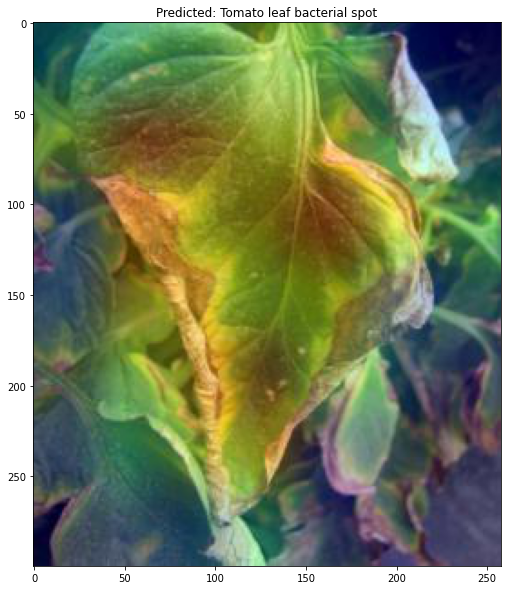

In [ ]:
fig = plt.figure(figsize=(10,10))
last_conv_layer_name='conv_pw_13_relu'
from matplotlib import cm
img_array = preprocess_input(get_img_array(img_path, size=img_size))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
cam_path = save_and_display_gradcam(img_path, heatmap)
title=(f"Predicted: {class_label[pred_index[0]]}")
plt.title(title)
plt.imshow(plt.imread(cam_path))

In [ ]:
class_label[8]

'Corn leaf blight'